In [1]:
from differentiable_lensing import DifferentiableLensing
import torch
import matplotlib.pyplot as plt

grid_shape = 128
resolution = 0.101/2

lensing_module = DifferentiableLensing('cpu', target_resolution=resolution, target_shape=grid_shape, alpha=None)
theta_x, theta_y, theta_x_as, theta_y_as = lensing_module.make_center_grid(-resolution * grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape)
theta_x, theta_y, theta_x_log, theta_y_log = lensing_module.make_log_grid(-resolution * grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape, c=4.5)
theta_x_log, theta_y_log = theta_x_log.unsqueeze(0), theta_y_log.unsqueeze(0)

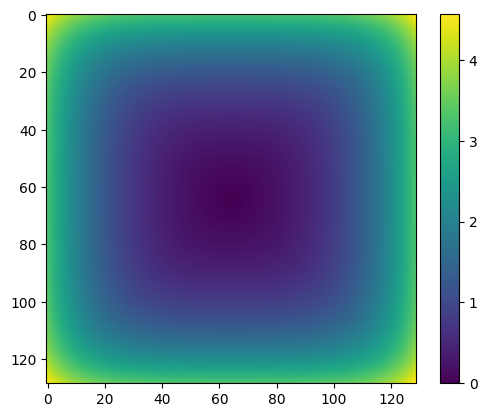

In [2]:
theta_r_log = (theta_x_log**2 + theta_y_log**2).sqrt()
plt.imshow(theta_r_log[0])
plt.colorbar()
theta_x_log, theta_y_log = theta_x_log[0], theta_y_log[0]

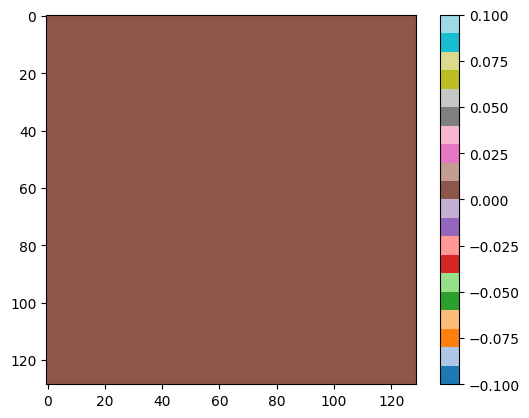

In [3]:
theta_r_log_flip = theta_r_log.flip(dims=[-1])
theta_r_log_flip_2 = theta_r_log.flip(dims=[-2])
plt.imshow((theta_r_log_flip[0] - theta_r_log[0]).abs() + (theta_r_log_flip_2[0] - theta_r_log[0]).abs(), cmap='tab20')
plt.colorbar()

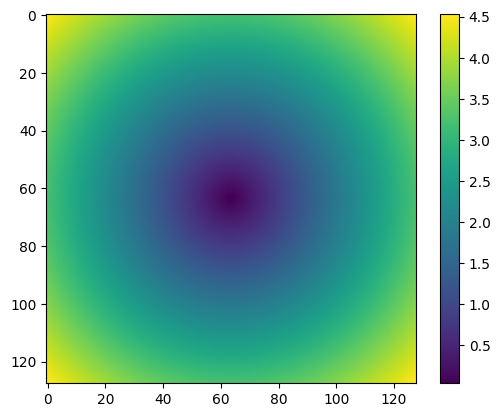

In [4]:
theta_r = (theta_x**2 + theta_y**2).sqrt()
plt.imshow(theta_r)
plt.colorbar()

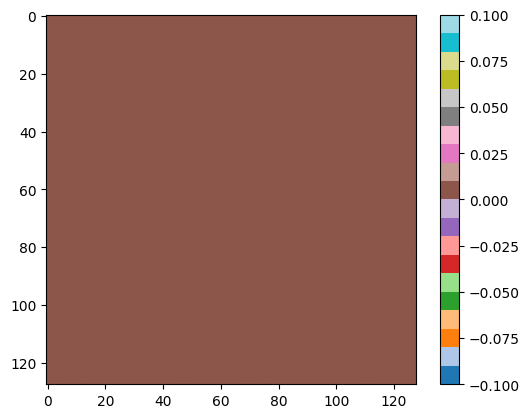

In [5]:
theta_r_flip = theta_r.flip(dims=[-1])
theta_r_flip_2 = theta_r.flip(dims=[-2])
plt.imshow((theta_r_flip - theta_r).abs() + (theta_r_flip_2 - theta_r).abs(), cmap='tab20')
plt.colorbar()

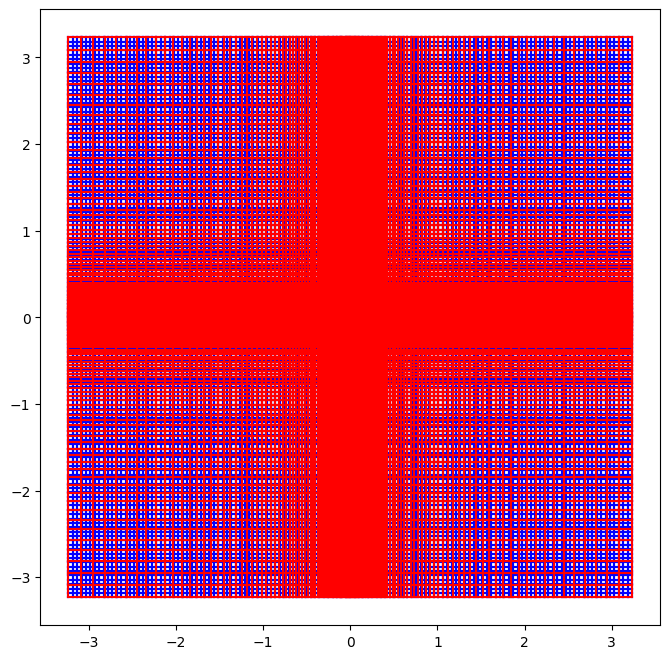

In [6]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)

axes.plot([theta_x_as[1:, :-1].flatten(), theta_x_as[1:, 1:].flatten()], [theta_y_as[1:, :-1].flatten(), theta_y_as[1:, 1:].flatten()], c='blue')
axes.plot([theta_x_as[1:, 1:].flatten(), theta_x_as[:-1, 1:].flatten()], [theta_y_as[1:, 1:].flatten(), theta_y_as[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x_as[:-1, 1:].flatten(), theta_x_as[:-1, :-1].flatten()], [theta_y_as[:-1, 1:].flatten(), theta_y_as[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x_as[:-1, :-1].flatten(), theta_x_as[1:, :-1].flatten()], [theta_y_as[:-1, :-1].flatten(), theta_y_as[1:, :-1].flatten()], c='blue')

axes.plot([theta_x_log[1:, :-1].flatten(), theta_x_log[1:, 1:].flatten()], [theta_y_log[1:, :-1].flatten(), theta_y_log[1:, 1:].flatten()], c='red')
axes.plot([theta_x_log[1:, 1:].flatten(), theta_x_log[:-1, 1:].flatten()], [theta_y_log[1:, 1:].flatten(), theta_y_log[:-1, 1:].flatten()], c='red')
axes.plot([theta_x_log[:-1, 1:].flatten(), theta_x_log[:-1, :-1].flatten()], [theta_y_log[:-1, 1:].flatten(), theta_y_log[:-1, :-1].flatten()], c='red')
axes.plot([theta_x_log[:-1, :-1].flatten(), theta_x_log[1:, :-1].flatten()], [theta_y_log[:-1, :-1].flatten(), theta_y_log[1:, :-1].flatten()], c='red')

axes
print()

In [7]:
grid_fracs = lensing_module.log_grid_crop(theta_x_as, theta_y_as, theta_x_log, theta_y_log)

Iterating through axis-oriented grid rows: 100%|██████████| 128/128 [7:05:12<00:00, 199.32s/it]  


In [8]:
As = lensing_module.nsq_As(theta_x_log, theta_y_log)
M, shape = lensing_module.build_sparse_mapping(grid_fracs, As, 'cpu')
torch.save(M, '2scatter_from_log_%d.pt'%grid_shape)